In [1]:
import numpy as np
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [3]:
x_train[3].shape

(28, 28)

In [4]:
type(x_train)

numpy.ndarray

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_train[5]

2

In [8]:
import matplotlib.pyplot as plt 

In [9]:
def plot_image(img):
    #  if this is given:(784,) => (28,28)
    # reshaping only for safety purpose
    img=img.reshape(28,28)
    plt.imshow(img,cmap="gray") # cmap=> Colormap which  used to map scalar data to colors.
    
    
    #  if "cmap"  is not given it will given any color to image

4


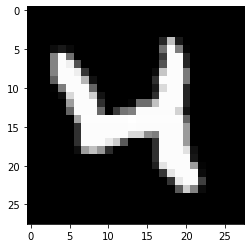

In [10]:
plot_image(x_train[20])
print(y_train[20])

In [11]:
# to make training and testing data ANN compatible 
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(60000, 784)
(10000, 784)
(60000,)


In [13]:
from keras.utils import to_categorical

# to_categorical = oneHot Encoding(dummy encoding)

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_test.shape

(10000, 10)

# Artificial Neural Network

In [14]:
from keras.models import Sequential
from keras.layers import Dense

## Activation Function in different layers

  **Input and Hidden layers**  <br/>
              ***-> use  "relu"***
              
  **Output Layer**<br/>
          ***-> 2 classes => Sigmoid function***<br/>
          ***-> More than 2 classes => Softmax function***

In [15]:
model = Sequential()

'''
    initially x_train=(60000,28,28) which needed to be reshape to (60000,784)
        because ANN accepts neurons as
                        vector not matrix.
'''

# units = no. of neurons in a particular layer

model.add(Dense(units = 32,activation = "relu",input_shape = (784,)))

# no need to give "input_shape for subsequent layers"

model.add(Dense(units = 64,activation = "relu"))
model.add(Dense(units = 128,activation = "relu"))
model.add(Dense(units = 32,activation = "relu"))

# Last Layer (output layer)

model.add(Dense(units=10,activation = "softmax")) 
# 10 units respresents that we have to predict no. [0,9]  

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 40,010
Trainable params: 40,010
Non-trainable params: 0
_________________________________________________________________


In [17]:
## Model is traines through => optimizer & loss function

model.compile(optimizer = "adam", loss = "categorical_crossentropy" , metrics=["accuracy"])

# adam = way of minimizing the function
# crossentropy = for classification
        # multi-class classification = catergorical_crossentropy
        # binary - class classification = binary_crossentropy

In [18]:
# train the model

model.fit(x = x_train, y = y_train,epochs=10,validation_data=(x_test,y_test),verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.7030 - accuracy: 0.8266 - val_loss: 0.2847 - val_accuracy: 0.9223
Epoch 2/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.2734 - accuracy: 0.9261 - val_loss: 0.2510 - val_accuracy: 0.9319
Epoch 3/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.2150 - accuracy: 0.9401 - val_loss: 0.2210 - val_accuracy: 0.9357
Epoch 4/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.1851 - accuracy: 0.9477 - val_loss: 0.2127 - val_accuracy: 0.9419
Epoch 5/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1645 - accuracy: 0.9534 - val_loss: 0.1985 - val_accuracy: 0.9460
Epoch 6/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.1508 - accuracy: 0.9559 - val_loss: 0.1959 - val_accuracy: 0.9456
Epoch 7/10
60000/60000 [==============================] - 2s 35us/st

(784,)

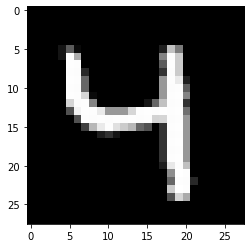

In [19]:
# lets test our model 

plot_image(x_test[901])
x_test[900].shape

In [20]:
model.predict_classes(x_test[901].reshape(1,784))[0]
# x_test[10].shape

4

# Testing model on a self made gray scale image

In [21]:
import PIL

In [22]:
print(PIL.__version__)

7.0.0


In [23]:
# load and show an image with Pillow

from PIL import Image

# Open the image form working directory

image = Image.open('test.png')

# summarize some details about the image

print(image.format)
print(image.size)
print(image.mode)

# show the image
image.show()

PNG
(190, 158)
RGBA


**Resizing the image to 28 x 28**

In [24]:
data=np.array(image.resize((28,28)))

In [25]:
print(data.shape)
print(type(data))

(28, 28, 4)
<class 'numpy.ndarray'>


#### Saving the resized image 

In [26]:
# saving the resized image
Image.fromarray(data).save('r_test.png')

### Since in our model we need only 2-dimensions ,Therefore droping the 3rd Dimension

In [27]:
newData=data[:,:,1]

In [28]:
newData.shape

(28, 28)

In [29]:
newData.reshape(784,)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 116,
       116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 115,  34,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        72, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       142,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  21,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,
       103, 253, 147,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

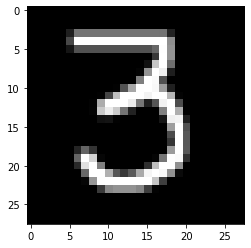

In [30]:
plot_image(newData)

## Predicting the output

In [31]:
model.predict_classes(newData.reshape(1,784))[0]

3